In [285]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from scipy.ndimage.interpolation import zoom
from pydicom import dcmread

In [286]:
eot_dir = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122'
nii_output = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122'

In [287]:
patient_folders = os.listdir(eot_dir)
print(patient_folders), len(patient_folders)

['c_4408', 'c_9122']


(None, 2)

In [ ]:
# remove files that aren't echo 5

for i in patient_folders:
    path = os.path.join(sot_dir, i)
    
    dcm_list = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".dcm"):
                dcm_list.append(os.path.join(root, file))
                
    for ii in dcm_list:
        dcm = dcmread(ii)
        echo_num = dcm.EchoNumbers
        
        if echo_num != 5:
            os.remove(ii)

In [321]:
patient_id = 'c_9122'

folder_path = os.path.join(eot_dir, patient_id)

dcm_list = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".dcm"):
            dcm_list.append(os.path.join(root, file))
            
data = {}
data['mag5_dcm_path'] = []
data['slice_location'] = []

for i in dcm_list:
    dcm = dcmread(i)
    data['mag5_dcm_path'].append(i)
    data['slice_location'].append(dcm.SliceLocation)

In [322]:
data = pd.DataFrame.from_dict(data)

print(data.to_string())

                                                                                                            mag5_dcm_path  slice_location
0   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0001.dcm      204.341217
1   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0002.dcm      194.341217
2   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0003.dcm      184.341217
3   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0004.dcm      174.341217
4   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0005.dcm      164.341217
5   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0006.dcm      154.341217
6   N:\2_Analysis\automated_analys

In [345]:
num1 = 14
num2 = 16

print(data['mag5_dcm_path'][num1]), print(data['slice_location'][num1])
print(data['mag5_dcm_path'][num2]), print(data['slice_location'][num2])

N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_HIGH_9007\IM-0003-0015.dcm
64.34121704
N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions_4408_9122\c_9122\FFLQ_LOW_9010\IM-0006-0002.dcm
64.92687225


(None, None)

In [346]:
dicoms1 = list(data['mag5_dcm_path'][:num1])

len(dicoms1)
dicoms1

['N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0001.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0002.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0003.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0004.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0005.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0006.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_HIGH_9007\\IM-0003-0007.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFL

In [347]:
dicom_im1 = dcmread(dicoms1[0]).pixel_array
dicom_im1.shape

(256, 256)

In [348]:
dicom_arr1 = np.zeros((dicom_im1.shape[0], dicom_im1.shape[1], len(dicoms1)))
dicom_arr1.shape

(256, 256, 14)

In [349]:
num = -1
for i in dicoms1:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr1[:,:,num] = dicom

dicom_arr1 = dicom_arr1
dicom_arr1.shape

(256, 256, 14)

In [350]:
dicoms2 = list(data['mag5_dcm_path'][num2:])

len(dicoms2)
dicoms2

['N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0002.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0003.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0004.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0005.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0006.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0007.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9010\\IM-0006-0008.dcm',
 'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions_4408_9122\\c_9122\\FFLQ_LOW_9

In [351]:
dicom_im2 = dcmread(dicoms2[0]).pixel_array
dicom_im2.shape

(256, 256)

In [352]:
dicom_arr2 = np.zeros((dicom_im2.shape[0], dicom_im2.shape[1], len(dicoms2)))
dicom_arr2.shape

(256, 256, 14)

In [353]:
num = -1
for i in dicoms2:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr2[:,:,num] = dicom

dicom_arr2 = dicom_arr2
dicom_arr2.shape

(256, 256, 14)

In [354]:
upper_dcm = dcmread(dicoms1[0])
lower_dcm = dcmread(dicoms2[0])

In [355]:
upper_x = upper_dcm.ImagePositionPatient[0]
lower_x = lower_dcm.ImagePositionPatient[0]

upper_y = upper_dcm.ImagePositionPatient[1]
lower_y = lower_dcm.ImagePositionPatient[1]

diff_x = -(upper_x - lower_x)
diff_y = -(upper_y - lower_y)

upper_x, lower_x, diff_x, upper_y, lower_y, diff_y

('-214.477', '-214.477', -0.0, '-272.623', '-272.721', -0.09800000000001319)

In [356]:
upper_ps = upper_dcm.PixelSpacing
lower_ps = lower_dcm.PixelSpacing

if upper_ps[0] == lower_ps[0]:
    pixel_spacing = upper_ps[0]
    print('pixel_spacing: ' + str(upper_ps[0]))
else:
    print('Different pixel spacing')

pixel_spacing: 1.875


In [357]:
# Affine transofrmation
x_shift = round(diff_x / pixel_spacing)
y_shift = round(diff_y / pixel_spacing)

print('x_shift: ', str(x_shift))
print('y_shift: ', str(y_shift))

M = np.float32([
    [1, 0, x_shift],
    [0, 1, y_shift]
    ])

x_shift:  0
y_shift:  0


In [358]:
for i in range(dicom_arr2.shape[2]):
    img = dicom_arr2[:,:,i]
    
    shifted = cv2.warpAffine(img, M, (dicom_im2.shape[1], dicom_im2.shape[0]))
    
    dicom_arr2[:,:,i] = shifted

In [359]:
combined = np.concatenate((dicom_arr1, dicom_arr2), axis = 2)
combined.shape

(256, 256, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

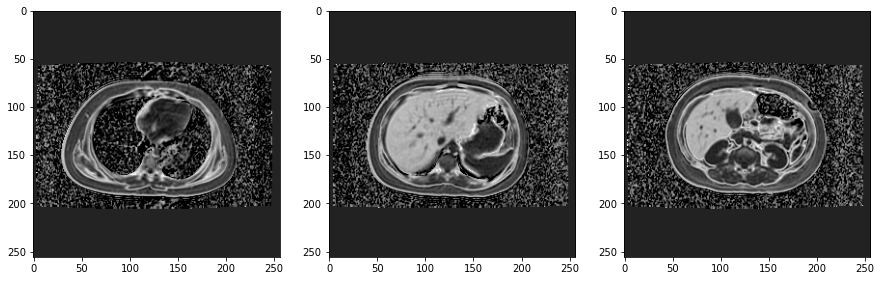

In [360]:
# CHECK IF REVERSED
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,1],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show

# FAR LEFT IMAGE SHOULD BE BOTTOM OF LIVER

In [361]:
# IF REVERSED, RUN THIS
combined = combined[:,:,::-1]
combined.shape

(256, 256, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

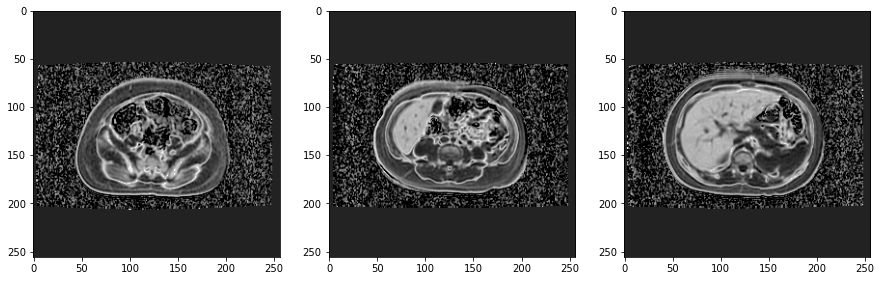

In [362]:
# CHECK IT FIXED IT
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show

In [363]:
combined.shape

(256, 256, 28)

In [364]:
# RESIZE IMAGE IF NEEDED
img_inter = cv2.resize(combined, (224, 224), interpolation = cv2.INTER_LINEAR)
img_inter.shape

(224, 224, 28)

In [365]:
seg_ni = r'N:\2_Analysis\automated_analysis\cynch_segmentations\analysis_masks\original_segseg/'
print(patient_id + ' saved')
new_im = nib.Nifti1Image(np.flip(np.rot90(img_inter), 1), affine = nib.load(seg_ni + patient_id + '.nii').affine)
nib.save(new_im, os.path.join(nii_output, patient_id))

c_9122 saved
